## Venn Diagram - Engineers in Matched sample - Advanced Activities

In [1]:
import pandas
import numpy
import nltk
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib_venn_wordcloud import venn2_wordcloud

### Advanced Activities (High Level and Design)

In [3]:
filepath = r'D:/BG/Paper_1/Count/BGT.txt'
df = pandas.read_csv(filepath, sep='\t', nrows=17422)
adv_m = df.loc[(df.SkillCluster=='materials science') & (df.IsSoftware==0), 'Skill_US'].tolist()
adv_p = df.loc[(df.SkillCluster=='product development') & (df.IsSoftware==0), 'Skill_US'].tolist()
adv_s = df.loc[(df.SkillClusterFamily=='science and research') & (df.IsSoftware==0), 'Skill_US'].tolist()
design = df.loc[(df.SkillCluster=='analog design') & (df.IsSoftware==0), 'Skill_US'].tolist() + df.loc[(df.SkillCluster=='creative design') & (df.IsSoftware==0), 'Skill_US'].tolist() + df.loc[(df.SkillCluster=='digital design') & (df.IsSoftware==0), 'Skill_US'].tolist() + df.loc[(df.SkillCluster=='drafting and engineering design') & (df.IsSoftware==0), 'Skill_US'].tolist() + df.loc[(df.SkillCluster=='graphic and visual design') & (df.IsSoftware==0), 'Skill_US'].tolist() + df.loc[(df.SkillCluster=='graphic and visual design software') & (df.IsSoftware==0), 'Skill_US'].tolist() + df.loc[(df.SkillCluster=='industrial design') & (df.IsSoftware==0), 'Skill_US'].tolist() + df.loc[(df.SkillCluster=='manufacturing design') & (df.IsSoftware==0), 'Skill_US'].tolist()
adv = adv_m + adv_p + adv_s + design

### Full sample

In [2]:
filepath = r'D:/BG/Data/Processing/4_data.txt'
data = pandas.read_csv(filepath, sep='\t')
data.shape

(3091485, 104)

### Engineers in matched - Bars for advanced activities with more than 0.1% frequency per posting by technology

2626 Engineers in AM
43720 All phrases in AM
6767 Advanced phrases in AM
74000 Engineers in TM
1020687 All phrases in TM
97306 Advanced phrases in TM


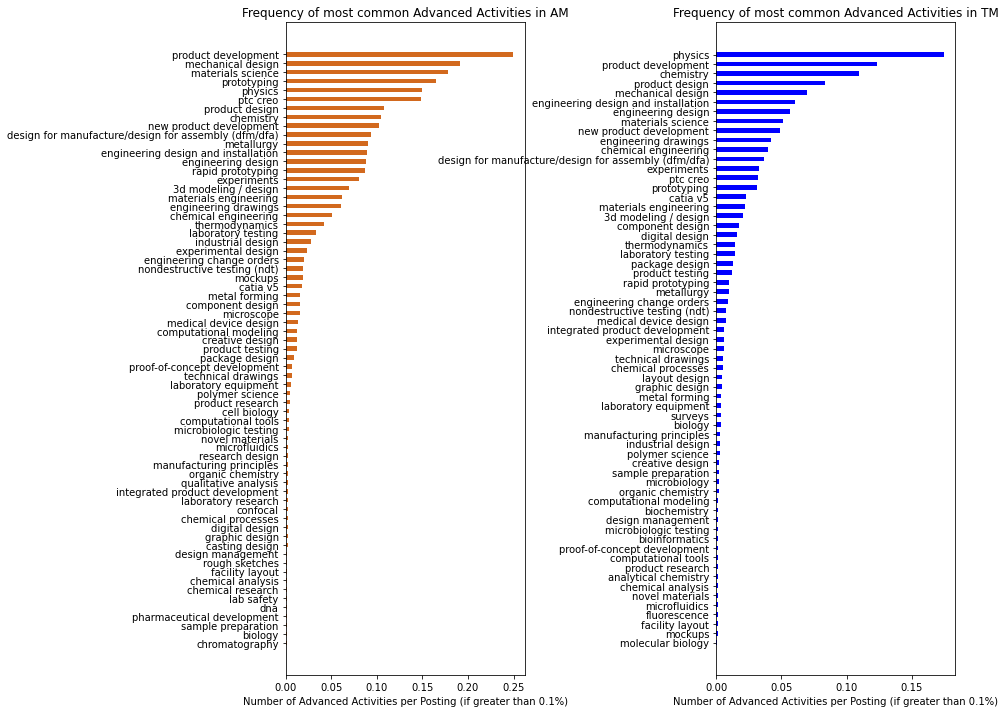

In [6]:
mydata = []
for i in ['AM','TM']:
  df = data[(data.Engineers==1) & (data.occupation=='Engineers') & (data.TECH==i)]
  df = df.SK_without.str.split(',').tolist()
  N = len(df)
  print(N,'Engineers in '+i)
  mylist = [term for job in df for term in job]
  print(len(mylist),'All phrases in '+i)
  mylist = [term for term in mylist if term in adv]
  print(len(mylist),'Advanced phrases in '+i)
  mylist = nltk.FreqDist(mylist).items()
  mylist = [(i,j/N) for (i,j) in mylist]
  mylist = [(i,j) for (i,j) in mylist if j > 0.001]
  mylist.sort(key=lambda x:x[1],reverse=True)
  mydata.append(mylist)

AM = mydata[0]
TM = mydata[1]
fig, axes = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(wspace=.8)
axes[0].barh([x[0] for x in AM],[x[1] for x in AM],.5,color='chocolate')
axes[0].invert_yaxis()
axes[0].set_title("Frequency of most common Advanced Activities in AM",fontsize=12)
axes[0].set_xlabel("Number of Advanced Activities per Posting (if greater than 0.1%)")
axes[1].barh([x[0] for x in TM],[x[1] for x in TM],.5,color='blue')
axes[1].invert_yaxis()
axes[1].set_title("Frequency of most common Advanced Activities in TM",fontsize=12)
axes[1].set_xlabel("Number of Advanced Activities per Posting (if greater than 0.1%)")
plt.show()

### Venn Diagram with Wordcloud

[]
0 BGT activities in AM but not in TM
['immunoassay', 'mass spectrometry', 'pipettes', 'genome', 'medicinal chemistry', 'sodium dodecyl', 'good clinical', 'bioreactors', 'qpcr', 'new drug', 'drug discovery', 'immunohistochemistry', 'liquid chromatography', 'toxicity', 'scientific analysis', 'sds-page', 'active pharmaceutical', 'next generation', 'microbiology', 'proteomics', 'color editing', 'protein characterization', 'gel electrophoresis', 'biologics development', 'microscopic examination', 'advanced manufacturing', 'laboratory automation', 'protein expression', 'navisworks', 'bam/bioburden', 'systems biology', 'project drawings', 'batch records', 'biomedical research', 'desktop publishing', 'spectrophotometers', 'protein chemistry', 'quantitative research', 'process piping', 'pipeline design', 'laboratory safety', 'typesetting', 'sequence analysis', 'laboratory information', 'bioinformatics', 'pharmaceutical dosage', 'microarrays', 'tissue culture', 'endotoxin', 'high throughput',

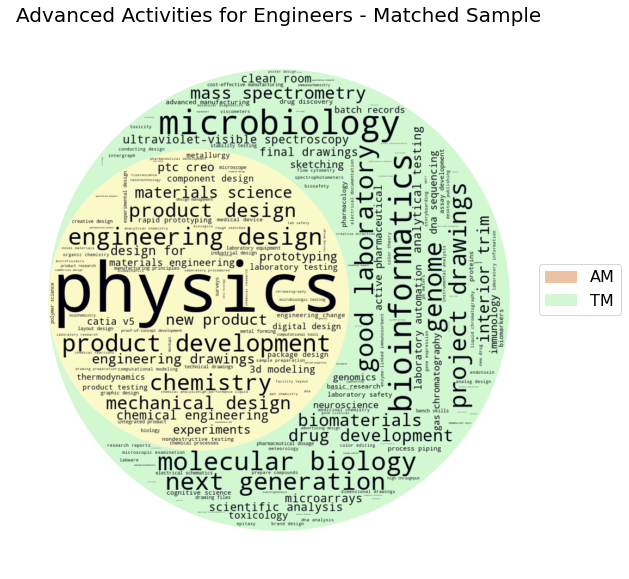

In [16]:
df = data[(data.Engineers==1) & (data.occupation=='Engineers')]
df = df.SK_without.str.split(',').tolist()
mylist = [term for job in df for term in job]
mylist = [term for term in mylist if term in adv]
mylist = [term.replace(' /','') for term in mylist]
mylist = [term.split()[0:2] for term in mylist]
mylist = [' '.join(term) for term in mylist]
mylist = [term for term in mylist if term!='print design']
mylist = [term for term in mylist if term!='page design']
mydict = {k:v for k,v in sorted(nltk.FreqDist(mylist).items(), key=lambda item: item[1],reverse=True)}
mydf = []
for i in ['AM','TM']:
  df = data[(data.Engineers==1) & (data.occupation=='Engineers') & (data.TECH==i)]
  df = df.SK_without.str.split(',').tolist()
  mylist = [term for job in df for term in job]
  mylist = [term for term in mylist if term in adv]
  mylist = [term.replace(' /','') for term in mylist]
  mylist = [term.split()[0:2] for term in mylist]
  mylist = [' '.join(term) for term in mylist]
  mylist = [term for term in mylist if term!='print design']
  mylist = [term for term in mylist if term!='page design']
  mylist = list(set(mylist))
  mydf.append(mylist)
AM = mydf[0]
TM = mydf[1]
AMnoTM = [phrase for phrase in AM if phrase not in TM]
print(AMnoTM)
print(len(AMnoTM),'BGT activities in AM but not in TM')
TMnoAM = [phrase for phrase in TM if phrase not in AM]
print(TMnoAM)
print(len(TMnoAM),'BGT activities in TM but not in AM')
AMTM = [phrase for phrase in AM if phrase in TM]
print(AMTM)
print(len(AMTM),'BGT activities in AM and in TM')

fig, ax = plt.subplots(figsize =(10,10))
ax.set_title('Advanced Activities for Engineers - Matched Sample', fontsize=20)
v = venn2_wordcloud([set(AM),set(TM)],ax=ax,set_colors=['chocolate','lightgreen'],set_edgecolors=[None,None],word_to_frequency=mydict)
fig.legend(handles=[patches.Rectangle((0,0),1,1,facecolor='chocolate',alpha=0.4,label='AM'),patches.Rectangle((0,0),1,1,facecolor='lightgreen',alpha=0.4,label='TM')],fontsize=16,loc='center right')